# Exploratory data analysis (1)

The gabage-in-gabage-out problem is a common nightmare in data science.

As a result, data exploration and data cleaning are often the first step to a successful industry data application. 

In this chapter we will cherry-pick some interesting findings.

The dataset file was not uploaded to this github repo for information safety consideration.

We start with showing a few samples of the dataset.

In [1]:
import pandas as pd

df_sku = pd.read_json('exercise2.jl', lines=True)


In [2]:
df_sku

,availability,brand,gender,item_code,long_description,product_name,retailer_code,retailer_price,retailer_url,e_price,e_product_name,e_brand_formatted,e_brand_formatted_slug,id,e_material,e_color,e_matched_tokens_categories_formatted,e_color_parent,e_image_urls_square_jpg
0,in-stock,Porter-Yoshida & Co,male,14829986,Black cotton Ikonik puffer Karl T-Shirt from K...,Porter-Yoshida & Co 2way tanker laptop bag - B...,enus-farfetch,575.0,https://www.farfetch.com/shopping/men/porter-y...,575.0,2way tanker laptop bag - Black,PORTER-YOSHIDA & CO.,porter-yoshida-co,farfetch_14829986_us,material-cotton,black,[Laptop Bags],black,[[/farfetch/3CXuyUJumttA4u/square/1x/250-210/p...
1,in-stock,Bottega Veneta,male,15500669,Black cotton Ikonik puffer Karl T-Shirt from K...,Bottega Veneta Intrecciato laptop case - Brown,enus-farfetch,2490.0,https://www.farfetch.com/shopping/men/bottega-...,2490.0,Intrecciato laptop case - Brown,Bottega Veneta,bottega-veneta,farfetch_15500669_us,material-cotton,brown,"[Laptop Bags, Laptop Case]",brown,[[/farfetch/2bbcoeY4U1smR7/square/1x/250-181/b...
2,in-stock,Paul Smith,male,220135,<p>Multicoloured laptop bag detailed with two ...,Car print laptop bag,enus-the-clutcher,741.0,https://www.theclutcher.com/en-US/product/2201...,741.0,Car print laptop bag,Paul Smith,paul-smith,the-clutcher_220135_us,None,silver,"[Bags, Laptop Bag]",silver,[[/the-clutcher/nmT1B2EmhuteL/square/1x/250-21...
3,in-stock,Coach,female,ch451f90db,<ul> <li> Refined calf leather</li><li> Fabric...,Tablet Sleeve,enus-orchard-mile,150.0,https://orchardmile.com/coach/tablet-sleeve-ch...,150.0,Tablet Sleeve,COACH,coach,orchard-mile_ch451f90db_us,material-leather,brown-dark_saddle,[Tablet Sleeve],brown,[[/orchard-mile/2Gn9CT1Z6Zw71V/square/1x/250-2...
4,in-stock,Bottega Veneta,male,16201180,Black cotton Ikonik puffer Karl T-Shirt from K...,Bottega Veneta Intrecciato woven laptop bag,enus-farfetch,2250.0,https://www.farfetch.com/shopping/men/bottega-...,2250.0,Intrecciato woven laptop bag,Bottega Veneta,bottega-veneta,farfetch_16201180_us,material-woven,black,[Laptop Bags],black,[[/farfetch/2sfSABM1CJyTnU/square/1x/250-192/b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26841,in-stock,North Sails x Prada Cup,male,15851973,Black cotton Ikonik puffer Karl T-Shirt from K...,North Sails x Prada Cup logo patch long-sleeve...,enus-farfetch,220.0,https://www.farfetch.com/shopping/men/north-sa...,187.0,logo patch long-sleeved polo shirt,North Sails x Prada Cup,north-sails-x-prada-cup,farfetch_15851973_us,material-cotton,blue,"[Long Sleeved, Long-Sleeved, Polo Shirts, Shor...",blue,[[/farfetch/2j4XenMeZbWq5r/square/1x/188-250/n...
26842,in-stock,Etro,male,15392050,Black cotton Ikonik puffer Karl T-Shirt from K...,Etro winged-horse print polo shirt,enus-farfetch,370.0,https://www.farfetch.com/shopping/men/etro-win...,185.0,winged-horse print polo shirt,Etro,etro,farfetch_15392050_us,material-cotton,blue,"[Polo Shirts, Short Sleeves]",blue,[[/farfetch/3mR2dNqvoDrxdg/square/1x/180-250/e...
26843,in-stock,Dolce & Gabbana,male,15235757,Black cotton Ikonik puffer Karl T-Shirt from K...,Dolce & Gabbana seahorse polo shirt,enus-farfetch,1245.0,https://www.farfetch.com/shopping/men/dolce-ga...,747.0,seahorse polo shirt,Dolce & Gabbana,dolce-gabbana,farfetch_15235757_us,material-cotton,blue,"[Polo Shirts, Short Sleeves]",blue,[[/farfetch/2NfBn4aEUibtBU/square/1x/184-250/d...
26844,in-stock,Kent & Curwen,male,15524661,Black cotton Ikonik puffer Karl T-Shirt from K...,Kent & Curwen short sleeve camouflage patch po...,enus-farfetch,288.0,https://www.farfetch.com/shopping/men/kent-cur...,216.0,short sleeve camouflage patch polo shirt,Kent & Curwen,kent-curwen,farfetch_15524661_us,material-cotton,green,"[Polo Shirts, Short Sleeves]",green,[[/farfetch/QAga5zG2GeRbe/square/1x/187-250/ke...


# Initial findings
 * item_code is unique in the dataset, which can be used as a primary key
 * There are a lot of natural language contents in many columns
 * `long_description`, `product_name` and `e_matched_tokens_categories_formatted` are especially interesting
 * Online web pages from urls in the `retailer_url` column contain further interesting information

# Data science 101

It's widely known that **word count** is the first lesson in map reduce.

However, few people care about word count in real world data engineering.

At the same time, it's widely known that `TF-IDF` is a common baseline used in natural language topic models.

However, few people care about the prerequisite of using TF-IDF.

In this chapter and the next chapter, we will connect the dots and present the magic.

## Part 1: Abnormal detection

In [3]:
def word_count(text):
    return len(text.split())

df_sku['long_desc_wc'] = df_sku['long_description'].apply(word_count)
df_sku[['long_description','long_desc_wc']]

,long_description,long_desc_wc
0,Black cotton Ikonik puffer Karl T-Shirt from K...,19
1,Black cotton Ikonik puffer Karl T-Shirt from K...,19
2,<p>Multicoloured laptop bag detailed with two ...,28
3,<ul> <li> Refined calf leather</li><li> Fabric...,60
4,Black cotton Ikonik puffer Karl T-Shirt from K...,19
...,...,...
26841,Black cotton Ikonik puffer Karl T-Shirt from K...,19
26842,Black cotton Ikonik puffer Karl T-Shirt from K...,19
26843,Black cotton Ikonik puffer Karl T-Shirt from K...,19
26844,Black cotton Ikonik puffer Karl T-Shirt from K...,19


**Let's have a look at the distribution of description length**

array([[<AxesSubplot:title={'center':'long_desc_wc'}>]], dtype=object)

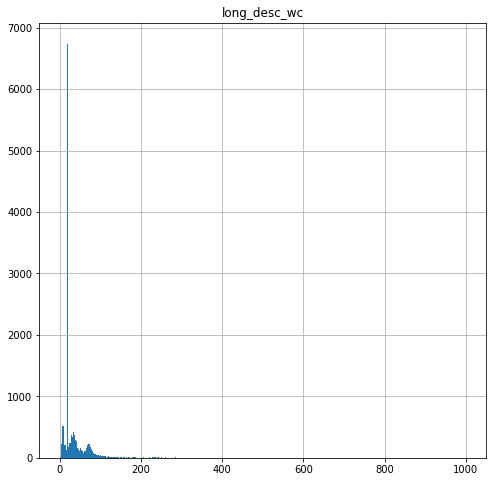

In [4]:
df_sku[['long_desc_wc']].hist(bins=range(1000), figsize=(8,8))

**Obviously there's something weird! Some buckets contain surprisingly more elements then other buckets**

A closer look show us more details:

In [5]:
df_sku[['long_desc_wc']].value_counts().reset_index('long_desc_wc', name='cnt')

,long_desc_wc,cnt
0,19,6740
1,8,561
2,7,516
3,9,510
4,37,479
...,...,...
388,346,1
389,342,1
390,340,1
391,242,1


**Apparently some text with 19 words has been repeated a lot of times, let's see what are they**

In [6]:
pd.set_option('display.max_colwidth', None)
df_sku[df_sku.long_desc_wc == 19][['long_description']]

,long_description
0,"Black cotton Ikonik puffer Karl T-Shirt from KARL LAGERFELD featuring padded design, crew neck, short sleeves and straight hem."
1,"Black cotton Ikonik puffer Karl T-Shirt from KARL LAGERFELD featuring padded design, crew neck, short sleeves and straight hem."
4,"Black cotton Ikonik puffer Karl T-Shirt from KARL LAGERFELD featuring padded design, crew neck, short sleeves and straight hem."
5,"Black cotton Ikonik puffer Karl T-Shirt from KARL LAGERFELD featuring padded design, crew neck, short sleeves and straight hem."
6,"Black cotton Ikonik puffer Karl T-Shirt from KARL LAGERFELD featuring padded design, crew neck, short sleeves and straight hem."
...,...
26841,"Black cotton Ikonik puffer Karl T-Shirt from KARL LAGERFELD featuring padded design, crew neck, short sleeves and straight hem."
26842,"Black cotton Ikonik puffer Karl T-Shirt from KARL LAGERFELD featuring padded design, crew neck, short sleeves and straight hem."
26843,"Black cotton Ikonik puffer Karl T-Shirt from KARL LAGERFELD featuring padded design, crew neck, short sleeves and straight hem."
26844,"Black cotton Ikonik puffer Karl T-Shirt from KARL LAGERFELD featuring padded design, crew neck, short sleeves and straight hem."


**Removing duplication descriptions reduces number of rows to 155.**

**In other words, `6740 - 155 = 6585` rows having duplicated description.**

In [7]:
df_sku[df_sku.long_desc_wc == 19][['long_description']].drop_duplicates()

,long_description
0,"Black cotton Ikonik puffer Karl T-Shirt from KARL LAGERFELD featuring padded design, crew neck, short sleeves and straight hem."
53,"Laptop bag made of leather. Two-way zip around closure. Rolled top handles. Approx. 14""L x 11""T x 1.25""D. Imported."
329,"Ben-Amun cross brooch. 24-karat gold electroplating. Round-cut, bezel-set stones. Glass stones and pearly glass. Safety-pin back. Made in USA."
675,"<p>Rhodium-plated art deco brooch with black enamel lines, rhinestones, and a jade center.<br> </p> <ul> <li>Dimensions: 2""x1.5""<br> </li> </ul>"
753,<p>Orchid brooch with yellow and brown enamel spots and crystal pavé. <br> </p> <p> Measurement: 2 1/2 Inches Long</p>
...,...
26271,<p>Crewneck cotton T-shirt<br>Color: black<br>Contrasting red band<br>White GCDS logo print<br>Ribbed neckline<br>Logo label on the bottom with silver metal detail<br>Loose fit</p>
26531,Moncler polo shirt with signature stripe tipping. Spread collar; three-button placket. Long sleeves. Straight hem. Pullover style. Cotton. Imported.
26590,Vince polo shirt in solid birdseye knit. Spread collar; three-button placket. Long sleeves. Straight hem. Pullover style. Wool/cashmere. Imported.
26605,Button closure; - Polo neck; - Cuffs and hem with cannolè. - Composition: 100% Merino Wool - Color: Black


**On the other side, the number of duplicated description is low in the rest of dataset**

In [8]:
df_sku[['long_description']].value_counts().reset_index(name='cnt')[:10]


,long_description,cnt
0,"Black cotton Ikonik puffer Karl T-Shirt from KARL LAGERFELD featuring padded design, crew neck, short sleeves and straight hem.",6562
1,Description coming soon,51
2,"Lacoste Men's Slim Fit Polo In Petit Piqué : Blue : A Seasonal Wardrobe Essential, This Polo Shirt Is Crafted In Signature Lacoste Cotton Petit Piqué. Perfect With Cotton Canvas Chino Pants And A Pair Of Sneakers From The Collection.",29
3,"Lacoste Men's Classic Fit L.12.12 Polo Shirt : Blue : A Signature Design From The Lacoste Wardrobe, This L.12.12 Polo Shirt In Cotton Petit Piqué Combines Comfort And Elegance. A Chic, Timeless Essential, Ideal For Any Occasion.",25
4,"Reusable non-medical face mask made of two layers of silk.<br>You can use the mask on either sides after disinfection!<br>Breathable, super light weight.<br>Ideal for cycling, camping, hiking, crafting, gardening, travel, shopping, outdoors.<br>Protect your skin, mouth and nose from dust, dry or polluted air.<br>A must-have item for people with sensitive skin.<br>Recommendations for use: The mask is fixed and removed using only the cords provided on the sides, avoiding touching the mask or face with your hands.<br>VERY IMPORTANT: The mask has no medical purpose and is not equipped with a system that destroys viruses. The masks are not sterile. It is recommended to wash them before use.<br>The mask has the role of protecting your airways, reducing the risk of coming into contact with invisible fine particles and acts as a physical barrier.<br>The mask can protect you, but also those around you, by blocking the transmission of drops or splashes to other people or surfaces.",25
5,Polo Ralph Lauren Classic Fit Mesh Polo Shirt-Men,25
6,Polo Ralph Lauren Classic Fit Soft Cotton Polo Shirt-Men,23
7,Polo Ralph Lauren Custom Slim Fit Mesh Polo Shirt-Men,22
8,"Lacoste Men's Marl Fabric L.12.12 Polo : Blue Chine : A Men's Wardrobe Essential, This Lacoste Polo Shirt In 100% Cotton Piqué Defines A Comfortable, Elegant Look. Marl Knit Fabric Adds A Stylish Twist.",20
9,"<p>Initial here, please. Keep your initial close to your heart with a charming brooch from Lisa C Bijoux. This is the first time designer Anna Lisa Caruso is doing alphabet letters so this is a true collectible. Handcrafted of Swarovski crystals in her atelier, with you in mind. Made in Italy.</p> <p>This item is final sale.</p> <p>Due to COVID-19, some of our designers are experiencing shipping delays. You can still place orders and they will ship as soon as possible. Please visit our FAQs for more information.</p>",19


**Further investigation shows lots of data are corrupted in the given dataset.**

for example, the following descriptions are **T-Shirt**, while the corresponding product names are **laptop/ipad bag**

In [9]:
df_sku[df_sku.long_desc_wc == 19][['long_description','product_name']][:5]

,long_description,product_name
0,"Black cotton Ikonik puffer Karl T-Shirt from KARL LAGERFELD featuring padded design, crew neck, short sleeves and straight hem.",Porter-Yoshida & Co 2way tanker laptop bag - Black
1,"Black cotton Ikonik puffer Karl T-Shirt from KARL LAGERFELD featuring padded design, crew neck, short sleeves and straight hem.",Bottega Veneta Intrecciato laptop case - Brown
4,"Black cotton Ikonik puffer Karl T-Shirt from KARL LAGERFELD featuring padded design, crew neck, short sleeves and straight hem.",Bottega Veneta Intrecciato woven laptop bag
5,"Black cotton Ikonik puffer Karl T-Shirt from KARL LAGERFELD featuring padded design, crew neck, short sleeves and straight hem.",Comme Des Garçons Wallet 'Luxury' ipad case - Blue
6,"Black cotton Ikonik puffer Karl T-Shirt from KARL LAGERFELD featuring padded design, crew neck, short sleeves and straight hem.",Rossignol logo-patch laptop sleeve 27cmx39cm - Red


Depending on how much data is corrupted, the data issue could be potentially very serious.

**If the description is wrong, then any machine learning model utilizing the description information might perform poorly**

Naturally, the next question is, how much data is corrupted?

Further exploration in the dataset suggests a hyperthesis:

**For a normal product, usually there are many common words between product description and product name**

So let's count how many common words are there between description and name in each row.

In [10]:
import re

def count_overlap_words(text1, text2):
    # Replace None with ''
    text1 = text1 or ''
    text2 = text2 or ''
    text1 = re.sub(r'[^\w\s]',' ', text1)
    text2 = re.sub(r'[^\w\s]',' ', text2)
    set1 = set(text1.lower().split())
    set2 = set(text2.lower().split())
    return len(set1.intersection(set2))

df_sku['desc_name_overlap_cnt'] = df_sku.apply(
    lambda df: count_overlap_words(df.long_description, df.product_name),
    axis=1
)


**Let's see the distribution of number of overlapping words between description and name in the whole dataset**

array([[<AxesSubplot:title={'center':'desc_name_overlap_cnt'}>]],
      dtype=object)

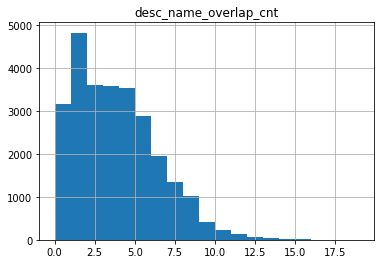

In [11]:
df_sku[['desc_name_overlap_cnt']].hist(bins=range(20))

**Remember there are a huge number of outliers when `length(description) == 19`**


array([[<AxesSubplot:title={'center':'desc_name_overlap_cnt'}>]],
      dtype=object)

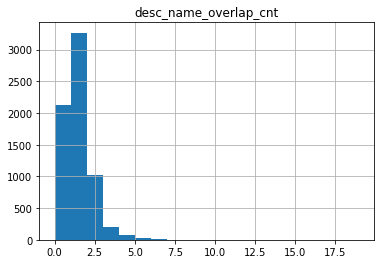

In [12]:
df_sku[df_sku.long_desc_wc == 19][['desc_name_overlap_cnt']].hist(bins=range(20))

**This is very interesting, especially when comparing with the rest of the dataset**

**Notice the `==` in the previous step is replaced with a `!=` here**

array([[<AxesSubplot:title={'center':'desc_name_overlap_cnt'}>]],
      dtype=object)

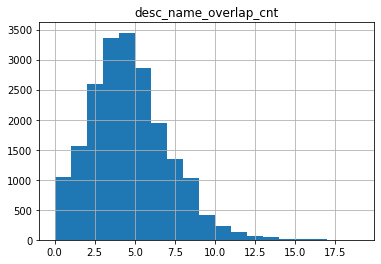

In [13]:
df_sku[df_sku.long_desc_wc != 19][['desc_name_overlap_cnt']].hist(bins=range(20))

**Let's remove all suspicious rows and see how the dataset looks like after**

array([[<AxesSubplot:title={'center':'long_desc_wc'}>]], dtype=object)

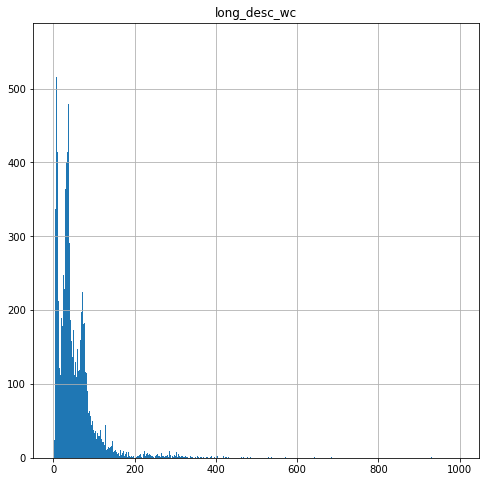

In [14]:
df_sku_clean = df_sku[df_sku['long_desc_wc'] != 19]
df_sku_clean[['long_desc_wc']].hist(bins=range(1000), figsize=(8,8))

**As we can see above, the distribution looks more comfortable now**

The chart above is still very interesting, with multiple peak instead of one.

Usually this is a hint that the dataset is a combination from multiple independent data sources which all have their own distribution and characteristics.

We don't need to worry too much about it now, we will leave it and keep going.

### Conclusion of part 1

 * Base on the analysis above, there seems to be about 6000 rows of data containing incorrect description
 * This accounts for about 23% of the dataset
 * Futher data cleanning is necessary when using the `long_description` column for machine learning

Similar analysis was applied with character count instead of word count.

Outlier with `char_len == 498` was found. However, that one seems to be caused by truncation from retailer CRM systems, which is not ideal but less harmful.


**Next chapter we will show another usage of word count.**

**We will explain why TF-IDF is a good start for the given dataset using result from this chapter and next chapter.**